Iterating through value table 500	
Stopped at 500


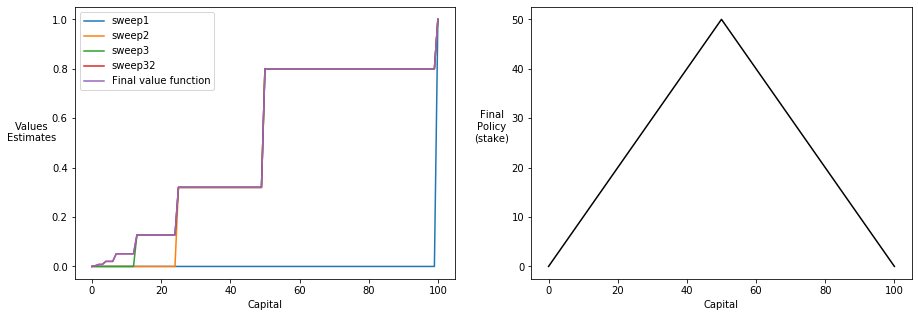

In [1]:
# MIT License

# Copyright (c) 2020 Eduardo Pignatelli

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE


import math
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


P_H = 0.4
WIN = 100


class GamblersProblem:
    def __init__(self):
        self.values = np.zeros((101,))
        self.values[100] = 1
        return

    def __str__(self):
        print(self.values)
        print(self.policy())
        return

    def render(self, values, mode="human"):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        # plot values
        ax[0].set_ylabel("Values\nEstimates", rotation=0, labelpad=20)
        ax[0].set_xlabel("Capital")
        l = []
        for v in values:
            l.append(ax[0].plot(v,))
        ax[0].legend(["sweep1", "sweep2", "sweep3",
                      "sweep32", "Final value function"])

        # plot policy
        ax[1].plot(self.policy(), c="black")
        ax[1].set_ylabel("Final\nPolicy\n(stake)", rotation=0, labelpad=20)
        ax[1].set_xlabel("Capital")
        plt.show()
        return fig, ax

    def state_space(self):
        return range(WIN + 1)

    def action_space(self, state=WIN + 1):
        return range(min(state, WIN - state) + 1)

    def policy(self):
        policy = np.empty_like(self.values, dtype=np.int32)
        for state in self.state_space():
            best_value, best_action = self.values[state], policy[state]
            for action in self.action_space(state):
                value = self.bellman_expectation(state, action)
                if value > best_value:
                    best_value = value
                    best_action = action
            policy[state] = action
        return policy

    def bellman_expectation(self, state, action):
        return P_H * (int(state + action >= WIN) + self.values[state + action])

    def value_iteration(self, plot=False):
        """
        Searches for the optimal state value table using value iteration to THETA
        """
        iteration = 0
        cache = []
        while True:
            print("Iterating through value table {}\t".format(iteration), end="\r")
            cache.append(self.values.copy())
            for state in self.state_space():
                best_value = self.values[state]
                for action in self.action_space(state):
                    value = self.bellman_expectation(state, action)
                    if value > best_value:
                        best_value = value
                self.values[state] = best_value

            if iteration == 500:
                print("\nStopped at {}".format(iteration))
                return cache

            if plot:
                self.render()
            iteration += 1

        raise ValueError(
            "The policy did not converge. Check your inputs or look for bugs.")


if __name__ == "__main__":
    env = GamblersProblem()
    iterations = env.value_iteration()
    env.render([iterations[0], iterations[2], iterations[3],
                iterations[32], iterations[-1]])
